**The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The NHANES interview includes demographic, socioeconomic, dietary, and health-related datasets. The main goal is to determine the types of diseases affecting patients. They need to cluster the disease into different types.**

**Dateset: demographic.csv, diet.csv, examinations.csv, labs.csv and questionnaire.csv**

**To achieve it, they need to perform the following tasks:**

**a)	First we will perform data cleaning and transform the data into a uniform format. (10 marks)**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [99]:
df_demographic=pd.read_csv('../Lab_Exam_Dataset/demographic.csv')
df_labs=pd.read_csv('../Lab_Exam_Dataset/labs.csv')
df_questionnaire=pd.read_csv('../Lab_Exam_Dataset/questionnaire.csv')
df_diet=pd.read_csv('../Lab_Exam_Dataset/diet.csv')
df_examination=pd.read_csv('../Lab_Exam_Dataset/examination.csv')
df=pd.concat([df_demographic, df_diet, df_examination, df_labs, df_questionnaire], axis=1)

In [100]:
missing_df = pd.DataFrame(df.isnull().mean() * 100).reset_index().rename(
    columns={"index": "Column", 0: "Missing %"}
).sort_values(by=["Missing %"], ascending=False)
missing_df = missing_df[missing_df['Missing %']>0]

In [101]:
df_high=missing_df[missing_df['Missing %']>70]

In [102]:
df_high.head()

Column  Missing %
1723  SMQ690J      100.0
69    DRQSDT5      100.0
1288  MCQ240I      100.0
1297  MCQ240R      100.0
244   BMIHEAD      100.0

In [103]:
df.shape

(10175, 1816)

In [104]:
df.drop(list(df_high['Column']),axis=1, inplace=True)

In [105]:
df.shape

(10175, 782)

In [106]:
print(df.dtypes.unique())

[dtype('int64') dtype('float64') dtype('O')]


In [107]:
df_type=pd.DataFrame({'type':df.dtypes})

In [108]:
df_object=df_type[df_type['type']=='object']

In [109]:
df_object.head()

type
OHX02CTC  object
OHX03CTC  object
OHX04CTC  object
OHX05CTC  object
OHX06CTC  object

In [110]:
df.drop(list(df_object.index), axis=1,inplace=True)

In [111]:
null=100*(df.isnull().sum())/(df.shape[0])
df_null=pd.DataFrame({'percentage':null})
df_medium=df_null[(df_null['percentage']<70) & (df_null['percentage']>0.5)]
for x in list(df_medium.index):
    df[x]=df[x].fillna(df[x].mean())
df.dropna(axis=0, inplace=True)
df.shape

(10137, 753)

In [112]:
df.isnull().sum().sum()

0

**b)	Afterwards, we will standardize the clean data and perform dimensionality reduction by Principal Component Analysis (PCA) as a preprocessing step prior to data segmentation. (15 marks)**

In [113]:
ss=StandardScaler()
scaled_df=ss.fit_transform(df)

In [114]:
pca=PCA()
pca.fit(scaled_df)

PCA()

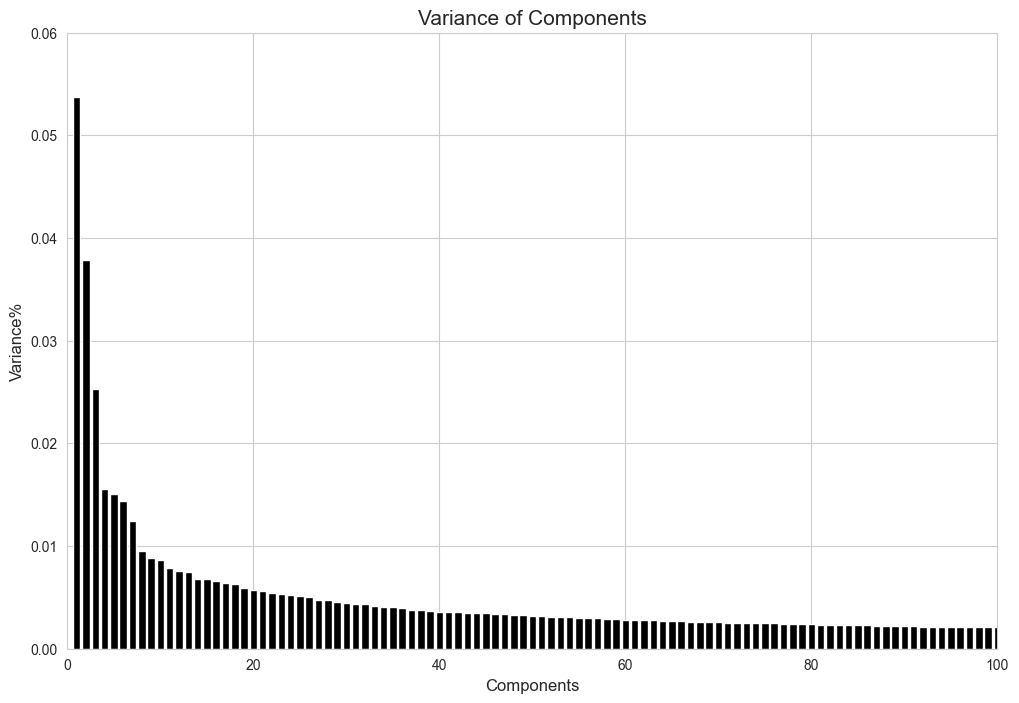

In [115]:
pca=PCA()
pca.fit(scaled_df)
plt.figure(figsize=(12,8))
plt.bar(x=list(range(1,754)), height=pca.explained_variance_ratio_,color='black')
plt.xlabel('Components',fontsize=12)
plt.ylim(0,0.06)
plt.xlim(0,100)
plt.ylabel('Variance%',fontsize=12)
plt.title('Variance of Components',fontsize=15)
plt.show()

There is a variance drop off at Number of components=3, and the first three components explain the majority of the variance in our data. So, we reduce the dimensionality by PCA using only 3 components.

In [116]:
pca=PCA(n_components=3)

In [117]:
pca.fit(scaled_df)


PCA(n_components=3)

In [118]:
X_pca=pca.transform(scaled_df)

/var/folders/_2/8dfz51s11dz9j_g55d_zb3mh0000gn/T/ipykernel_25729/3983795824.py:13: MatplotlibDeprecationWarning:

The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.



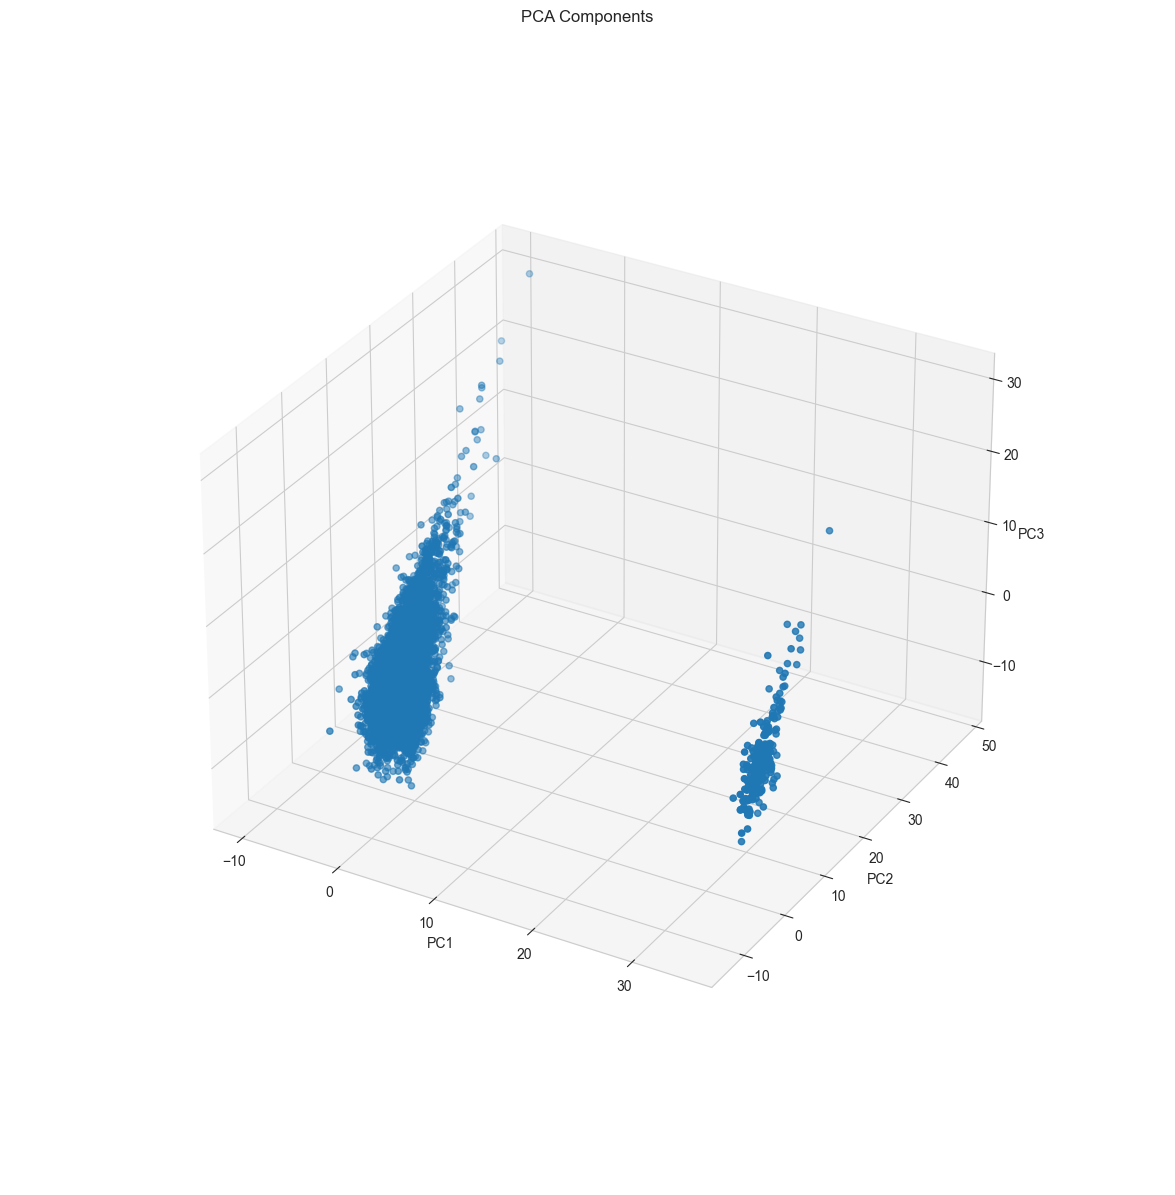

In [119]:
# Create a 3D plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

# Plot the PCA components
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])

# Customize the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Components')
ax.dist = 13

# Show the plot
plt.show()

**c)	Finally, we will find the main clusters or types of the diseases by KMeans Clustering. (10 marks)**

In [120]:
X=X_pca
inertia=[]
for n in range (1,11):
    model=KMeans( n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model.fit(X)
    inertia.append(model.inertia_)
print(inertia)

/Users/sam/.pyenv/versions/3.11.1/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



[882179.037206716, 494334.51259587926, 321525.59144036035, 206593.23055639496, 167856.73791043725, 140354.46767602087, 119639.29023490727, 107045.40123929967, 95935.58599118033, 88722.79208724617]


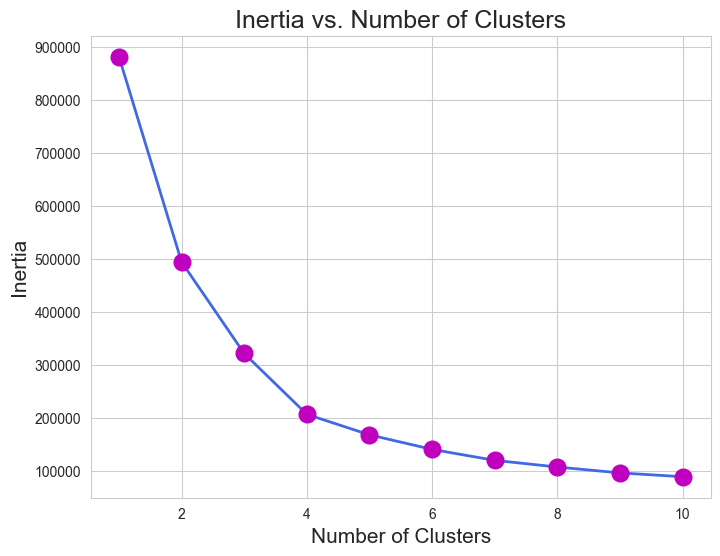

In [121]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,11)), inertia, linewidth=2, markersize=12, color='royalblue', marker='o',markerfacecolor='m', markeredgecolor='m')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

In [122]:
model=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model.fit(X)
labels=model.labels_
centers=model.cluster_centers_

/var/folders/_2/8dfz51s11dz9j_g55d_zb3mh0000gn/T/ipykernel_25729/298439962.py:13: MatplotlibDeprecationWarning:

The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.



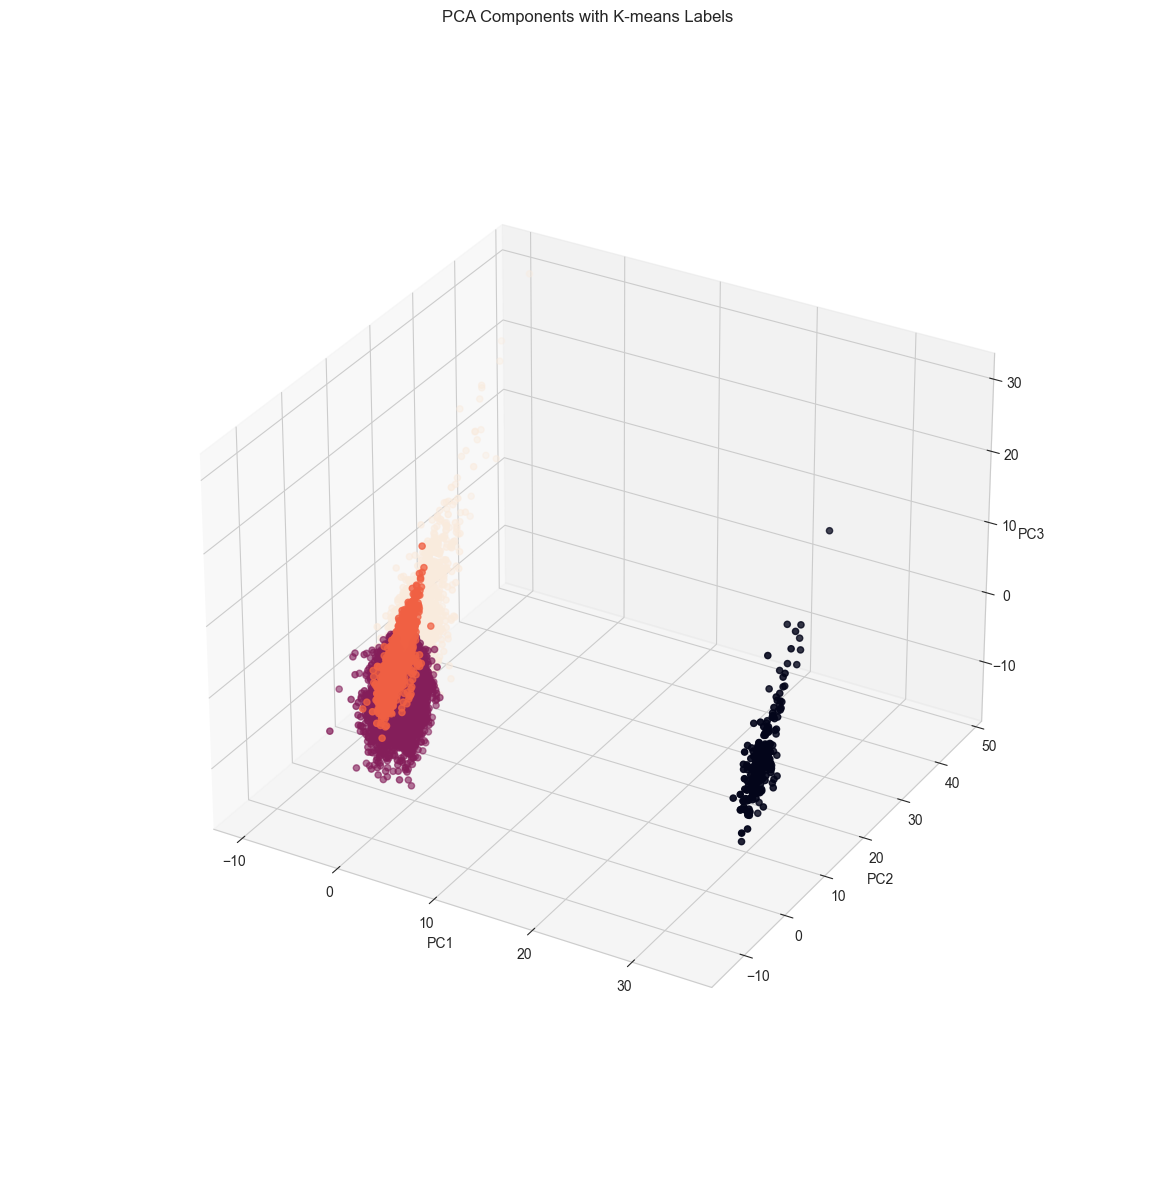

In [126]:
# Create a 3D plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

# Plot the PCA components with K-means labels
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)

# Customize the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Components with K-means Labels')
ax.dist = 13

# Show the plot
plt.show()

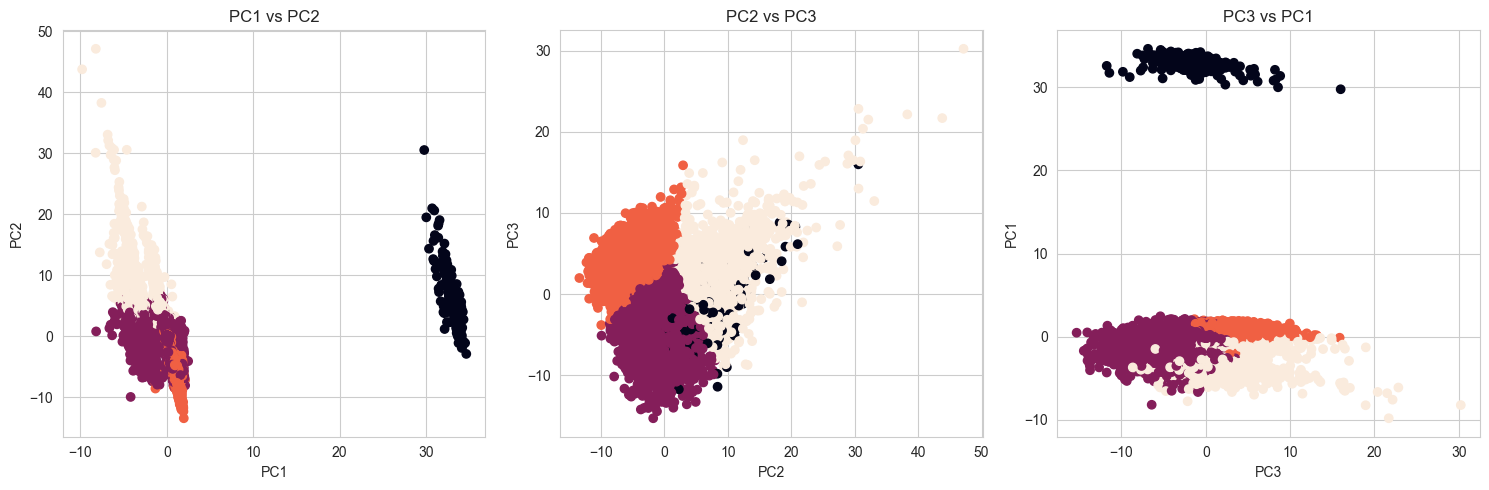

In [128]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot PC1 vs PC2 with labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PC1 vs PC2')

# Plot PC2 vs PC3 with labels
axes[1].scatter(X_pca[:, 1], X_pca[:, 2], c=labels)
axes[1].set_xlabel('PC2')
axes[1].set_ylabel('PC3')
axes[1].set_title('PC2 vs PC3')

# Plot PC3 vs PC1 with labels
axes[2].scatter(X_pca[:, 2], X_pca[:, 0], c=labels)
axes[2].set_xlabel('PC3')
axes[2].set_ylabel('PC1')
axes[2].set_title('PC3 vs PC1')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()